In [1]:
import joypy
import pandas as pd
import geopandas as gpd
from matplotlib import cm

In [2]:
gpd.options.io_engine = "pyogrio"

In [3]:
df = gpd.read_file('basin_data.gpkg')

C:\Users\k000851\AppData\Local\miniforge3\envs\SatvisTest\Lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


In [4]:
df

,dim_0,time,BASIN_NR,basin_name,area,bloom_area,cloud_area,fca,geometry
0,0,2002-06-01,9,Östra Gotlandshavet,64599679622,NaN,3.246573e+10,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
1,0,2002-06-02,9,Östra Gotlandshavet,64599679622,NaN,9.812709e+09,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
2,0,2002-06-03,9,Östra Gotlandshavet,64599679622,2.560000e+08,6.803233e+08,0.004005,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
3,0,2002-06-04,9,Östra Gotlandshavet,64599679622,2.590000e+08,7.633756e+08,0.004057,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
4,0,2002-06-05,9,Östra Gotlandshavet,64599679622,1.331000e+09,1.607781e+09,0.021130,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
...,...,...,...,...,...,...,...,...,...
2120,0,2023-09-22,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
2121,0,2023-09-23,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
2122,0,2023-09-24,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9..."
2123,0,2023-09-25,9,Östra Gotlandshavet,64599679622,9.000000e+06,4.055366e+10,0.000374,"POLYGON ((706381.13080 6322005.71510, 706379.9..."


In [6]:
df['year'] = df['time'].dt.year
df

,dim_0,time,BASIN_NR,basin_name,area,bloom_area,cloud_area,fca,geometry,year
0,0,2002-06-01,9,Östra Gotlandshavet,64599679622,NaN,3.246573e+10,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
1,0,2002-06-02,9,Östra Gotlandshavet,64599679622,NaN,9.812709e+09,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
2,0,2002-06-03,9,Östra Gotlandshavet,64599679622,2.560000e+08,6.803233e+08,0.004005,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
3,0,2002-06-04,9,Östra Gotlandshavet,64599679622,2.590000e+08,7.633756e+08,0.004057,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
4,0,2002-06-05,9,Östra Gotlandshavet,64599679622,1.331000e+09,1.607781e+09,0.021130,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
...,...,...,...,...,...,...,...,...,...,...
2120,0,2023-09-22,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
2121,0,2023-09-23,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
2122,0,2023-09-24,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
2123,0,2023-09-25,9,Östra Gotlandshavet,64599679622,9.000000e+06,4.055366e+10,0.000374,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023


In [44]:
df['fca'] = df['fca'].fillna(0)

In [49]:
df['time']

0                         0
1                         0
2       2002-06-03 00:00:00
3       2002-06-04 00:00:00
4       2002-06-05 00:00:00
               ...         
2120                      0
2121                      0
2122                      0
2123    2023-09-25 00:00:00
2124                      0
Name: time, Length: 2125, dtype: object

In [45]:
for year in range(2002, df['year'].max()+1)
    df['time']

0       0.000000
1       0.000000
2       0.004005
3       0.004057
4       0.021130
          ...   
2120    0.000000
2121    0.000000
2122    0.000000
2123    0.000374
2124    0.000000
Name: fca, Length: 2125, dtype: float64

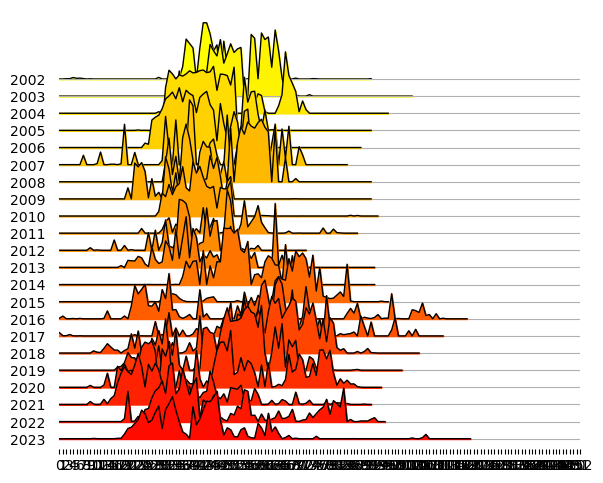

In [46]:
%matplotlib inline

x_range = list(range(153))
# labels=[y if y%10==0 else None for y in list(df.time.unique())]
fig, axes = joypy.joyplot(df, by="year", column="fca", labels=None, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title=None, kind='values', x_range=x_range,
                          colormap=cm.autumn_r)
axes[-1].set_xticks(x_range);